## **문제 1: 데이터 로드 및 탐색**

- **데이터의 첫 5개 행을 출력**하여 데이터 형식을 확인하세요.
- **데이터프레임의 컬럼 정보**와 **결측치 여부**를 확인하고 전처리 전략을 고민해보세요.

In [ ]:
# 라이브러리 불러오기
!pip install openpyxl
import pandas as pd

# 파일 경로 설정 (로컬에 다운로드한 경우)
file_path = 'online_retail_II.xlsx'

# 엑셀 파일 읽기
# 데이터가 2개 시트에 나뉘어 있습니다 (Year 2009-2010, Year 2010-2011)
retail_1 = pd.read_excel(file_path, sheet_name='Year 2009-2010')
retail_2 = pd.read_excel(file_path, sheet_name='Year 2010-2011')

# 두 데이터를 하나로 합치기
retail = pd.concat([retail_1, retail_2], ignore_index=True)



In [13]:
# 데이터 확인
retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


### **문제 2: 데이터 전처리**

- **`InvoiceDate`** 컬럼을 날짜 형식으로 변환하고, **`Customer ID`**에 결측치가 있는 행을 제거하세요.
- **`Customer ID`**를 정수형으로 변환한 후, **`InvoiceDate`**를 기준으로 데이터를 정렬하세요.
- 금액을 나타내는 새로운 컬럼 **`Total`** 을 생성하세요 (`Quantity`와 `Price`를 곱한 값).

In [15]:
# 1. InvoiceDate를 날짜(datetime) 형식으로 변환
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

In [14]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  int64         
 7   Country      824364 non-null  object        
 8   Total        824364 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 62.9+ MB


In [5]:
retail['Customer ID'] #Length: 1067371

0          13085.0
1          13085.0
2          13085.0
3          13085.0
4          13085.0
            ...   
1067366    12680.0
1067367    12680.0
1067368    12680.0
1067369    12680.0
1067370    12680.0
Name: Customer ID, Length: 1067371, dtype: float64

In [6]:
# 2. Customer ID가 결측치(NaN)인 행 제거
retail = retail.dropna(subset=['Customer ID'])

retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
# 3. Customer ID를 정수형(int)으로 변환
retail['Customer ID'] = retail['Customer ID'].astype(int)

# 4. InvoiceDate를 기준으로 데이터 정렬
retail = retail.sort_values(by='InvoiceDate')

retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
1067357,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France
1067356,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France
1067361,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France


In [8]:
# 5. Total 컬럼 생성 (Quantity * Price)
retail['Total'] = retail['Quantity'] * retail['Price']

In [9]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


### **문제 3: 나라별 구매 인원 시각화**

- **`Country`** 컬럼을 기준으로 **`Customer ID`**의 유니크한 값을 계산하여 나라별 구매 고객 수를 시각화 해보세요

In [10]:
retail['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Netherlands', 'Poland',
       'Spain', 'Channel Islands', 'Italy', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland',
       'Switzerland', 'Unspecified', 'Nigeria', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland', 'Lebanon',
       'Saudi Arabia', 'Czech Republic', 'European Community'],
      dtype=object)

In [11]:
retail['Country'].nunique() # 중복제외 나랏 수

41

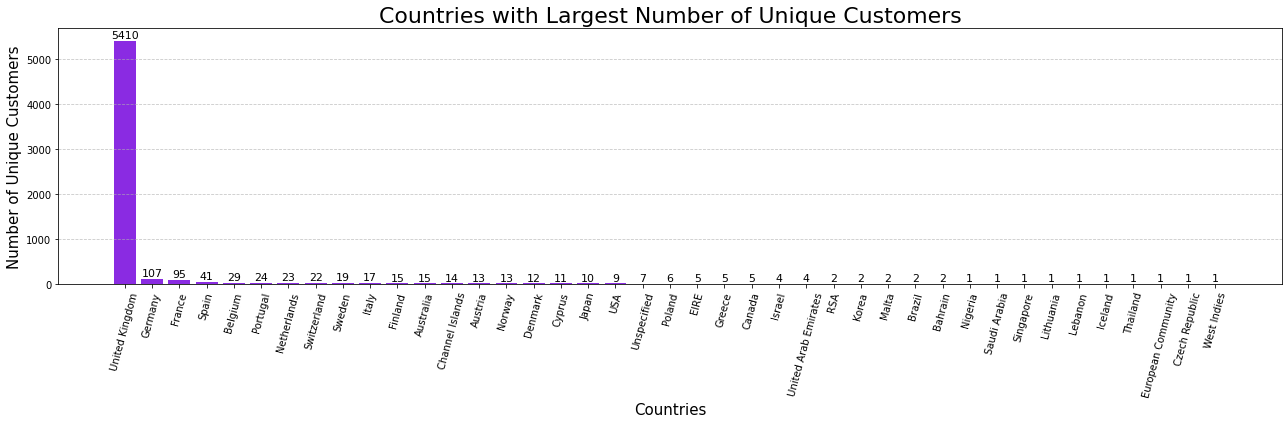

In [17]:
import matplotlib.pyplot as plt
# 나라별 유니크 고객 수 정리
country_customer = retail.groupby('Country')['Customer ID'].nunique().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(18, 6))
bars = plt.bar(country_customer.index, country_customer.values, color='blueviolet')

# 숫자 라벨 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom', fontsize=11)

plt.title('Countries with Largest Number of Unique Customers', fontsize=22)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Number of Unique Customers', fontsize=15)
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **문제 4: Acquisition (고객 유입 분석)**

- 신규 고객 분석을 위해 고객의 **첫 구매 시점**을 기준으로 월별 신규 유입 고객 수를 계산하세요.
- 각 고객의 첫 구매 날짜를 추출하고, **월별 신규 고객 수**를 시각화하세요.

In [18]:
# CustomerID별로 첫 구매 날짜 추출
first_purchase = retail.groupby('Customer ID')['InvoiceDate'].min().reset_index()
first_purchase.columns = ['Customer ID', 'FirstPurchaseDate']

In [19]:
retail.head(30)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom,39.60
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085,United Kingdom,59.50
11,489435,22353,LUNCHBOX WITH CUTLERY FAIRY CAKES,12,2009-12-01 07:46:00,2.55,13085,United Kingdom,30.60
10,489435,22195,HEART MEASURING SPOONS LARGE,24,2009-12-01 07:46:00,1.65,13085,United Kingdom,39.60


In [20]:
# '연-월' 형식으로 변환 (ex: 2010-12)
first_purchase['FirstPurchaseMonth'] = first_purchase['FirstPurchaseDate'].dt.to_period('M').astype(str)

# 월별 신규 고객 수 집계
new_customers_by_month = first_purchase['FirstPurchaseMonth'].value_counts().sort_index()

In [21]:
first_purchase['FirstPurchaseMonth']

0       2009-12
1       2010-10
2       2010-09
3       2009-12
4       2011-02
         ...   
5937    2010-02
5938    2010-10
5939    2010-02
5940    2009-12
5941    2009-12
Name: FirstPurchaseMonth, Length: 5942, dtype: object

In [22]:
new_customers_by_month

2009-12    1045
2010-01     394
2010-02     363
2010-03     436
2010-04     291
2010-05     254
2010-06     269
2010-07     183
2010-08     158
2010-09     242
2010-10     379
2010-11     322
2010-12      77
2011-01      71
2011-02     123
2011-03     178
2011-04     105
2011-05     108
2011-06     108
2011-07     102
2011-08     106
2011-09     187
2011-10     221
2011-11     192
2011-12      28
Name: FirstPurchaseMonth, dtype: int64

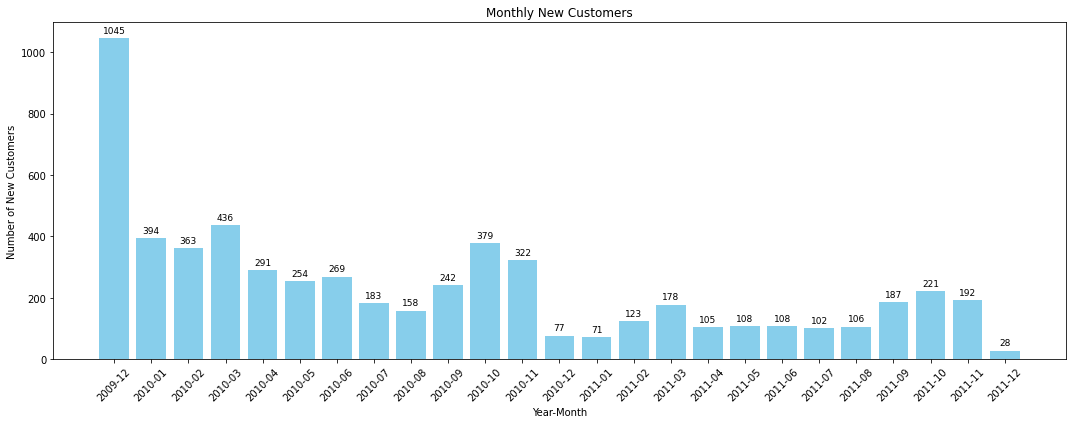

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
bars = plt.bar(new_customers_by_month.index, new_customers_by_month.values, color='skyblue')
plt.title('Monthly New Customers')
plt.xlabel('Year-Month')
plt.ylabel('Number of New Customers')
plt.xticks(rotation=45)

# 바 위에 숫자 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, str(int(height)), 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


### **문제 5: Activation (고객 활성화 분석)**

- 모든 고객 중 첫 구매 이후 **총 구매 금액이 특정 기준 금액 (£50)** 이상인 고객을 활성화된 고객으로 정의합니다.
- 전체 고객 수와 활성화된 고객 수를 비교하여 **활성화율**을 도출하세요.

In [24]:
# 고객별 총 구매 금액 계산
customer_total = retail.groupby('Customer ID')['Total'].sum().reset_index()
customer_total.columns = ['Customer ID', 'TotalAmount']
customer_total

,Customer ID,TotalAmount
0,12346,-64.68
1,12347,5633.32
2,12348,2019.40
3,12349,4404.54
4,12350,334.40
...,...,...
5937,18283,2736.65
5938,18284,436.68
5939,18285,427.00
5940,18286,1188.43


In [25]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [26]:
# 기준 금액 이상인 고객 필터링
activated_customers = customer_total[customer_total['TotalAmount'] >= 50]
activated_customers

,Customer ID,TotalAmount
1,12347,5633.32
2,12348,2019.40
3,12349,4404.54
4,12350,334.40
5,12351,300.93
...,...,...
5937,18283,2736.65
5938,18284,436.68
5939,18285,427.00
5940,18286,1188.43


In [27]:
total_customers = customer_total['Customer ID'].nunique()
active_customers = activated_customers['Customer ID'].nunique()

activation_rate = active_customers / total_customers * 100
print(f"총 고객 수: {total_customers}")
print(f"활성화된 고객 수: {active_customers}")
print(f"고객 활성화율: {activation_rate:.2f}%")

총 고객 수: 5942
활성화된 고객 수: 5777
고객 활성화율: 97.22%


### **문제 6: Retention:코호트 분석(고객)**

- 분기별 활성 사용자(MAU)를 분석하여 고객 유지 현황을 파악하세요.
- 분기별 활성 고객 수를 계산하고, 이를 시각화하여 **고객 유지 트렌드**를 분석하세요.

In [28]:
retail['InvoiceQuarter'] = retail['InvoiceDate'].dt.to_period('Q') # 분기 정보 컬럼 생성

In [29]:
retail['InvoiceQuarter']

0          2009Q4
1          2009Q4
2          2009Q4
3          2009Q4
4          2009Q4
            ...  
1067357    2011Q4
1067356    2011Q4
1067369    2011Q4
1067361    2011Q4
1067370    2011Q4
Name: InvoiceQuarter, Length: 824364, dtype: period[Q-DEC]

In [30]:
retail['CohortQuarter'] = retail.groupby('Customer ID')['InvoiceQuarter'].transform('min') #고객별 최초 구매 분기(코호트) 지정

In [31]:
retail.head(50)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,InvoiceQuarter,CohortQuarter
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009Q4,2009Q4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009Q4,2009Q4
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009Q4,2009Q4
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009Q4,2009Q4
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009Q4,2009Q4
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom,39.60,2009Q4,2009Q4
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009Q4,2009Q4
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085,United Kingdom,59.50,2009Q4,2009Q4
11,489435,22353,LUNCHBOX WITH CUTLERY FAIRY CAKES,12,2009-12-01 07:46:00,2.55,13085,United Kingdom,30.60,2009Q4,2009Q4
10,489435,22195,HEART MEASURING SPOONS LARGE,24,2009-12-01 07:46:00,1.65,13085,United Kingdom,39.60,2009Q4,2009Q4


In [32]:
#  코호트 인덱스 계산 (0부터 시작)

retail['CohortIndex'] = (retail['InvoiceQuarter'].dt.quarter + (retail['InvoiceQuarter'].dt.year * 4)) - \
                        (retail['CohortQuarter'].dt.quarter + (retail['CohortQuarter'].dt.year * 4))
retail['CohortIndex']

0          0
1          0
2          0
3          0
4          0
          ..
1067357    1
1067356    1
1067369    1
1067361    1
1067370    1
Name: CohortIndex, Length: 824364, dtype: int64

In [33]:
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,InvoiceQuarter,CohortQuarter,CohortIndex
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009Q4,2009Q4,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009Q4,2009Q4,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009Q4,2009Q4,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009Q4,2009Q4,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009Q4,2009Q4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1067357,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011Q4,2011Q3,1
1067356,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011Q4,2011Q3,1
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011Q4,2011Q3,1
1067361,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,15.00,2011Q4,2011Q3,1


In [34]:
#코호트 테이블 생성 (고객 수 카운트)

cohort_data = retail.groupby(['CohortQuarter', 'CohortIndex'])['Customer ID'].nunique().reset_index()
cohort_counts = cohort_data.pivot(index='CohortQuarter', columns='CohortIndex', values='Customer ID')


In [35]:
cohort_counts 

CohortIndex,0,1,2,3,4,5,6,7,8
CohortQuarter,,,,,,,,,
2009Q4,1045.0,673.0,688.0,619.0,714.0,525.0,517.0,509.0,572.0
2010Q1,1193.0,610.0,573.0,608.0,416.0,431.0,444.0,408.0,NaN
2010Q2,814.0,324.0,348.0,183.0,245.0,227.0,244.0,NaN,NaN
2010Q3,583.0,281.0,148.0,155.0,192.0,188.0,NaN,NaN,NaN
2010Q4,778.0,168.0,196.0,162.0,275.0,NaN,NaN,NaN,NaN
2011Q1,372.0,159.0,125.0,136.0,NaN,NaN,NaN,NaN,NaN
2011Q2,321.0,142.0,127.0,NaN,NaN,NaN,NaN,NaN,NaN
2011Q3,395.0,210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,441.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#Retention Rate 계산 (% 단위)

cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis=0) * 100
retention

CohortIndex,0,1,2,3,4,5,6,7,8
CohortQuarter,,,,,,,,,
2009Q4,100.0,64.401914,65.837321,59.234450,68.325359,50.239234,49.473684,48.708134,54.736842
2010Q1,100.0,51.131601,48.030176,50.963956,34.870075,36.127410,37.217100,34.199497,NaN
2010Q2,100.0,39.803440,42.751843,22.481572,30.098280,27.886978,29.975430,NaN,NaN
2010Q3,100.0,48.198971,25.385935,26.586621,32.933105,32.246998,NaN,NaN,NaN
2010Q4,100.0,21.593830,25.192802,20.822622,35.347044,NaN,NaN,NaN,NaN
2011Q1,100.0,42.741935,33.602151,36.559140,NaN,NaN,NaN,NaN,NaN
2011Q2,100.0,44.236760,39.563863,NaN,NaN,NaN,NaN,NaN,NaN
2011Q3,100.0,53.164557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


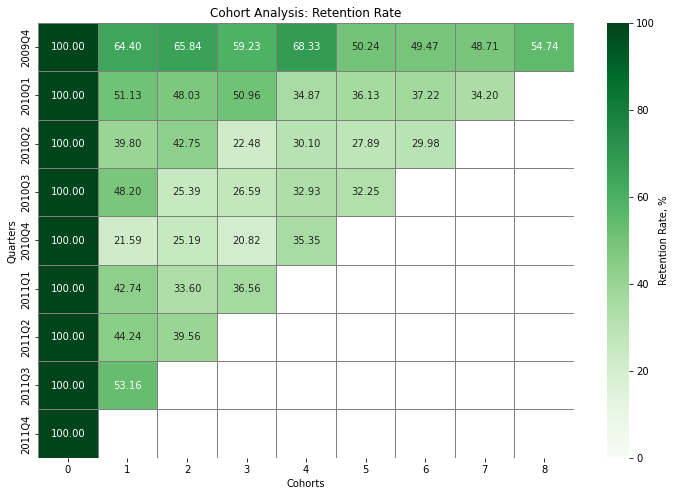

In [37]:
import seaborn as sns


plt.figure(figsize=(12, 8))
sns.heatmap(
    retention,
    annot=True,
    fmt=".2f",
    cmap="Greens",
    cbar_kws={'label': 'Retention Rate, %'},
    linewidths=0.5,
    linecolor='gray',
    vmin=0, vmax=100
)
plt.title("Cohort Analysis: Retention Rate")
plt.xlabel("Cohorts")
plt.ylabel("Quarters")
plt.show()


### **문제 8: Revenue : ARPU**

- 각 고객의 월별 **구매 금액**을 집계하고, 이를 기반으로 **ARPU**를 분석하세요.

In [40]:
print(retail.columns)


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Total', 'InvoiceQuarter',
       'CohortQuarter', 'CohortIndex', 'InvoiceMonth'],
      dtype='object')


In [41]:
# 필요한 열 생성
# 월 단위로 변환
retail['InvoiceMonth'] = retail['InvoiceDate'].dt.to_period('M')

# 수익 계산 (단가 * 수량)
retail['Revenue'] = retail['Price'] * retail['Quantity']


In [42]:
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,InvoiceQuarter,CohortQuarter,CohortIndex,InvoiceMonth,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009Q4,2009Q4,0,2009-12,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009Q4,2009Q4,0,2009-12,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009Q4,2009Q4,0,2009-12,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009Q4,2009Q4,0,2009-12,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009Q4,2009Q4,0,2009-12,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067357,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011Q4,2011Q3,1,2011-12,19.80
1067356,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011Q4,2011Q3,1,2011-12,19.80
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011Q4,2011Q3,1,2011-12,14.85
1067361,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,15.00,2011Q4,2011Q3,1,2011-12,15.00


In [43]:
# 월별 고객별 구매 금액 집계

monthly_revenue = retail.groupby(['InvoiceMonth', 'Customer ID'])['Revenue'].sum().reset_index()

In [44]:
monthly_revenue

,InvoiceMonth,Customer ID,Revenue
0,2009-12,12346,113.50
1,2009-12,12349,-24.15
2,2009-12,12358,1429.83
3,2009-12,12359,760.69
4,2009-12,12362,130.00
...,...,...,...
26988,2011-12,18245,894.25
26989,2011-12,18272,367.88
26990,2011-12,18273,51.00
26991,2011-12,18282,77.84


In [45]:
# 월별 고객별 구매 금액 집계
arpu = monthly_revenue.groupby('InvoiceMonth')['Revenue'].mean().reset_index()

In [52]:
arpu

,InvoiceMonth,Revenue
0,2009-12,634.710096
1,2010-01,676.784863
2,2010-02,606.443105
3,2010-03,572.454078
4,2010-04,561.758539
5,2010-05,527.235923
6,2010-06,521.881196
7,2010-07,569.621356
8,2010-08,609.187199
9,2010-09,649.778121


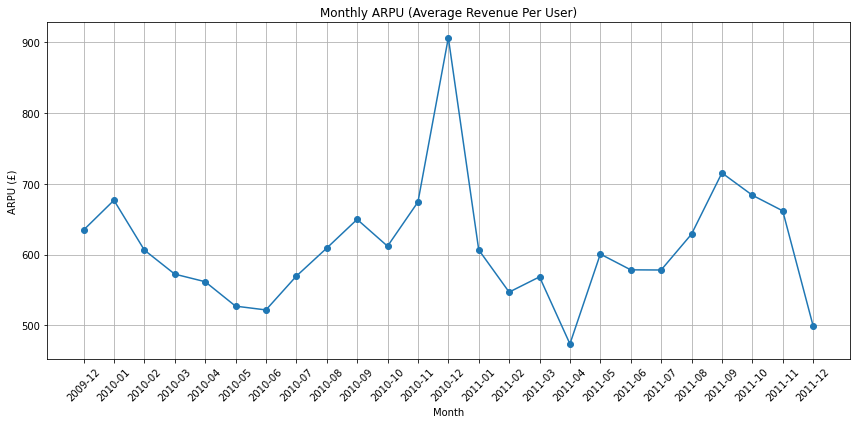

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(arpu['InvoiceMonth'].astype(str), arpu['Revenue'], marker='o', linestyle='-')
plt.title('Monthly ARPU (Average Revenue Per User)')
plt.xlabel('Month')
plt.ylabel('ARPU (£)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [55]:
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,InvoiceQuarter,CohortQuarter,CohortIndex,InvoiceMonth,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009Q4,2009Q4,0,2009-12,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009Q4,2009Q4,0,2009-12,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009Q4,2009Q4,0,2009-12,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009Q4,2009Q4,0,2009-12,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009Q4,2009Q4,0,2009-12,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067357,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011Q4,2011Q3,1,2011-12,19.80
1067356,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011Q4,2011Q3,1,2011-12,19.80
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011Q4,2011Q3,1,2011-12,14.85
1067361,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,15.00,2011Q4,2011Q3,1,2011-12,15.00


### **문제 9: Revenue(CLV)**

- 고객 생애 가치를 예측하기 위해 **CLV**를 계산하고 표로 CLV기준으로 내림차순으로 정렬해보세요
- **CLV 식: 평균금액 x  평균 구매 빈도 x 고객유지기간**(단, Invoce Date의 최대 최소를 빼준 뒤 1을 더해주기)

In [ ]:
# 코드에 "Customer Lifespan"이 모두 0으로 계산되어 있습니다. 이는 CLV = 평균금액 × 구매 빈도 × 고객 유지기간 공식에서 
# 유지기간이 0이므로 CLV가 잘못 계산되고 있다는 의미입니다.

# 이 문제는 고객별 InvoiceDate의 최소/최대 차이를 일(day)로 구하지 않았거나, 
# 고객별이 아니라 전체 기간 기준으로 계산한 경우 발생할 수 있습니다.

In [78]:
import pandas as pd

# 필요한 열만 선택
clv_df = retail[['Customer ID', 'InvoiceDate', 'Total']].copy()

# 고객별 총 수익
total_revenue = clv_df.groupby('Customer ID')['Total'].sum()

# 고객별 구매 횟수
frequency = clv_df.groupby('Customer ID')['InvoiceDate'].count()

# 고객별 최초, 최종 구매일
lifespan = clv_df.groupby('Customer ID')['InvoiceDate'].agg(['min', 'max'])
lifespan['Customer Lifespan (days)'] = (lifespan['max'] - lifespan['min']).dt.days + 1

# 평균 구매 금액 = 총 수익 / 구매 횟수
avg_order_value = total_revenue / frequency

# CLV 계산: 평균금액 x 구매빈도 x 고객유지기간
clv = avg_order_value * frequency * lifespan['Customer Lifespan (days)']

# 결과 통합
clv_result = pd.DataFrame({
    'Customer ID': total_revenue.index,
    'CLV': clv.round(2),
    'Total Revenue': total_revenue.round(2),
    'Frequency': frequency,
    'Customer Lifespan (days)': lifespan['Customer Lifespan (days)']
}).sort_values(by='CLV', ascending=False)

# 인덱스 리셋 및 일부 데이터 출력
clv_result.reset_index(drop=True, inplace=True)
clv_result.head(10)


,Customer ID,CLV,Total Revenue,Frequency,Customer Lifespan (days)
0,18102,4.420810e+08,598215.22,1068,739
1,14646,3.851798e+08,523342.07,3890,736
2,14156,2.161957e+08,296564.69,4130,729
3,14911,1.994434e+08,270248.53,11613,738
4,13694,1.396843e+08,190825.52,1558,732
5,17511,1.263362e+08,171885.98,2134,735
6,16684,1.031551e+08,141502.25,749,729
7,17450,1.004391e+08,233579.39,448,430
8,15061,1.002477e+08,136391.48,998,735
9,15311,8.388616e+07,113513.07,4717,739


## 기초통계 문제

<aside>
💡 문제 10 ~ 13: 기본 통계분포 함수를 이용하여 문제를 풀어보세요.
</aside>

### 문제10

- 어떤 회사의 고객 대기시간은 5분에서 15분 사이의 균등분포를 따릅니다. 고객 100명이 대기한 시간을 시뮬레이션하고, 평균 대기시간과 표준편차를 계산하세요.

In [79]:
import numpy as np

# 분포 파라미터 설정
min_wait = 5  # 최소 대기 시간 (분)
max_wait = 15 # 최대 대기 시간 (분)
num_customers = 100 # 고객 수

# 균등분포를 따르는 100명의 고객 대기 시간 시뮬레이션
# np.random.uniform(low, high, size) 함수 사용
waiting_times = np.random.uniform(min_wait, max_wait, num_customers)

# 평균 대기 시간 계산
mean_waiting_time = np.mean(waiting_times)

# 표준편차 계산 (표본 표준편차 사용을 위해 ddof=1 설정)
std_waiting_time = np.std(waiting_times, ddof=1)

# 결과 출력
print(f"평균 대기시간: {mean_waiting_time:.2f}")
print(f"표준편차: {std_waiting_time:.2f}")

평균 대기시간: 9.79
표준편차: 2.96


### 문제11

- 한 신제품의 초기 성공 확률이 0.3이라고 가정합니다. 10회의 시뮬레이션에서 성공한 횟수를 구하고, 각 성공 여부를 출력하세요.

In [80]:
import numpy as np

# 신제품 성공 확률
success_probability = 0.3

# 시뮬레이션 횟수
num_simulations = 10

# 10회 시도 시뮬레이션
# 0과 1 사이의 난수 10개를 생성하고, 확률(0.3)보다 작으면 성공(1), 크면 실패(0)로 간주
# np.random.rand(num_simulations)는 0부터 1 사이의 균등분포 난수 num_simulations 개를 생성합니다.
# < success_probability 비교를 통해 성공(True)과 실패(False)를 판별합니다.
# .astype(int)를 통해 True는 1로, False는 0으로 변환합니다.
outcomes = (np.random.rand(num_simulations) < success_probability).astype(int)

# 성공 횟수 계산 (결과 배열의 합)
success_count = np.sum(outcomes)

# 결과 출력
print(f"각 시도 결과: {outcomes}")
print(f"성공 횟수: {success_count}")

각 시도 결과: [1 0 0 1 1 0 0 1 1 1]
성공 횟수: 6


### 문제12

- 한 수업에서 학생 20명이 5문제로 구성된 퀴즈를 치릅니다. 각 문제의 정답 확률은 0.7이라고 가정할 때, 각 학생이 맞힌 점수를 시뮬레이션하고, 전체 학생의 평균 점수를 계산하세요.

In [81]:
# 퀴즈 설정
num_questions = 5      # 문제 수 (n)
prob_correct = 0.7     # 각 문제의 정답 확률 (p)
num_students = 20      # 학생 수 (시뮬레이션 횟수)

# 각 학생의 점수 시뮬레이션 (이항 분포 사용)
# 각 학생은 5번의 독립적인 시도를 하고, 각 시도에서 정답 확률은 0.7입니다.
# 이는 이항 분포 B(n=5, p=0.7)를 따릅니다.
# np.random.binomial(n, p, size) 함수는 n번의 시도에서 성공 확률 p로 성공한 횟수를 size번 시뮬레이션합니다.
# 여기서는 각 학생(size=20)이 5문제(n=5)를 맞힐 확률(p=0.7)을 시뮬레이션하여 각 학생의 점수를 얻습니다.
scores = np.random.binomial(num_questions, prob_correct, num_students)

# 전체 학생의 평균 점수 계산
average_score = np.mean(scores)

# 결과 출력
print(f"학생별 점수: {scores}")
print(f"평균 점수: {average_score:.2f}")

학생별 점수: [4 4 3 4 3 3 4 5 4 3 3 3 3 2 2 5 4 5 4 4]
평균 점수: 3.60


### 문제13

- 한 공장에서 생산되는 제품의 무게는 평균 50g, 표준편차 5g의 정규분포를 따릅니다.1000개의 제품 무게를 시뮬레이션하고, 무게가 45g 이상 55g 이하인 제품의 비율을 계산(변수명: `within_range`)하세요. 무게 분포의 히스토그램을 그리세요.

45g 이상 55g 이하 비율: 69.80%


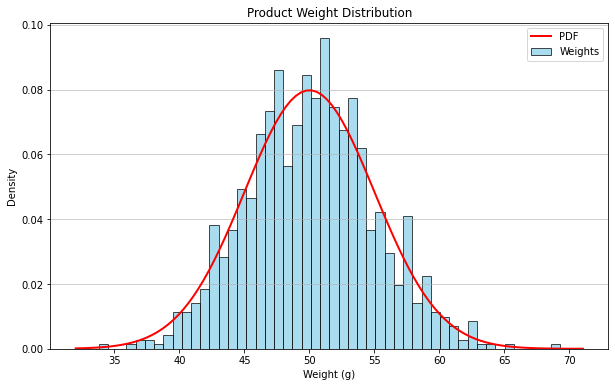

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 정규분포 파라미터
mu = 50  # 평균 (g)
sigma = 5 # 표준편차 (g)
n_samples = 1000 # 시뮬레이션할 제품 수

# 제품 무게 시뮬레이션
np.random.seed(42) # 결과를 재현 가능하도록 seed 설정 (선택 사항)
simulated_weights = np.random.normal(loc=mu, scale=sigma, size=n_samples)

# 무게 범위 설정 (45g 이상 55g 이하)
lower_bound = 45
upper_bound = 55

# 범위 내에 있는 제품 수 계산
within_range_mask = (simulated_weights >= lower_bound) & (simulated_weights <= upper_bound)
count_within_range = np.sum(within_range_mask)

# 범위 내 제품 비율 계산
within_range = count_within_range / n_samples

# 결과 출력 (이 부분은 이전 문제의 요구사항이므로 유지합니다)
print(f"45g 이상 55g 이하 비율: {within_range:.2%}")

# 무게 분포 히스토그램 및 PDF 그리기
plt.figure(figsize=(10, 6))

# 히스토그램 그리기 (density=True로 설정하여 y축을 밀도(Density)로 만듦)
plt.hist(simulated_weights, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black', label='Weights')

# 정규분포 PDF 곡선을 그리기 위한 x 값 생성
# 시뮬레이션된 데이터의 범위를 약간 넘어서도록 설정
xmin, xmax = plt.xlim() # 현재 히스토그램의 x축 범위 가져오기
x = np.linspace(xmin, xmax, 100) # xmin부터 xmax까지 100개의 등간격 점 생성

# 정규분포 PDF 값 계산
p = norm.pdf(x, mu, sigma)

# PDF 곡선 그리기
plt.plot(x, p, 'r', linewidth=2, label='PDF') # 'r'은 빨간색, linewidth는 선 두께

# 그래프 제목 및 레이블 설정
plt.title('Product Weight Distribution') # 이미지와 동일하게 제목 설정
plt.xlabel('Weight (g)')
plt.ylabel('Density') # density=True 이므로 y축 레이블을 Density로 설정

# 범례 표시
plt.legend()

# 그래프 표시
plt.grid(axis='y', alpha=0.75) # 필요하다면 그리드 추가
plt.show()